In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import joblib
from time import time

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    roc_auc_score, log_loss, f1_score, accuracy_score
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import permutation_importance

from xgboost import XGBClassifier

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
df = pd.read_csv("balanced_tb_data.csv")
df_test = pd.read_csv("balanced_tb_data_clean.csv")

In [3]:
columns_to_drop = [
    "weight_loss",
    "tb_prior",
    "reported_cough_dur",
    "night_sweats",
    "heart_rate"
]

df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])
df_test = df_test.drop(columns=[col for col in columns_to_drop if col in df_test.columns])

In [4]:
df.head(2)

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49,feat_50,feat_51,feat_52,feat_53,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,feat_94,feat_95,feat_96,feat_97,feat_98,feat_99,feat_100,feat_101,feat_102,feat_103,feat_104,feat_105,feat_106,feat_107,feat_108,feat_109,feat_110,feat_111,feat_112,feat_113,feat_114,feat_115,feat_116,feat_117,feat_118,feat_119,feat_120,feat_121,feat_122,feat_123,feat_124,feat_125,feat_126,feat_127,feat_128,feat_129,feat_130,feat_131,feat_132,feat_133,feat_134,feat_135,feat_136,feat_137,feat_138,feat_139,feat_140,feat_141,feat_142,feat_143,feat_144,feat_145,feat_146,feat_147,feat_148,feat_149,feat_150,feat_151,feat_152,feat_153,feat_154,feat_155,feat_156,feat_157,feat_158,feat_159,feat_160,feat_161,feat_162,feat_163,feat_164,feat_165,feat_166,feat_167,feat_168,feat_169,feat_170,feat_171,feat_172,feat_173,feat_174,feat_175,feat_176,feat_177,feat_178,feat_179,feat_180,feat_181,feat_182,feat_183,feat_184,feat_185,feat_186,feat_187,feat_188,feat_189,feat_190,feat_191,feat_192,feat_193,feat_194,feat_195,feat_196,feat_197,feat_198,feat_199,feat_200,feat_201,feat_202,feat_203,feat_204,feat_205,feat_206,feat_207,feat_208,feat_209,feat_210,feat_211,feat_212,feat_213,feat_214,feat_215,feat_216,feat_217,feat_218,feat_219,feat_220,feat_221,feat_222,feat_223,feat_224,feat_225,feat_226,feat_227,feat_228,feat_229,feat_230,feat_231,feat_232,feat_233,feat_234,feat_235,feat_236,feat_237,feat_238,feat_239,feat_240,feat_241,feat_242,feat_243,feat_244,feat_245,feat_246,feat_247,feat_248,feat_249,feat_250,feat_251,feat_252,feat_253,feat_254,feat_255,feat_256,feat_257,feat_258,feat_259,feat_260,feat_261,feat_262,feat_263,feat_264,feat_265,feat_266,feat_267,feat_268,feat_269,feat_270,feat_271,feat_272,feat_273,feat_274,feat_275,feat_276,feat_277,feat_278,feat_279,feat_280,feat_281,feat_282,feat_283,feat_284,feat_285,feat_286,feat_287,feat_288,feat_289,feat_290,feat_291,feat_292,feat_293,feat_294,feat_295,feat_296,feat_297,feat_298,feat_299,feat_300,feat_301,feat_302,feat_303,feat_304,feat_305,feat_306,feat_307,feat_308,feat_309,feat_310,feat_311,feat_312,feat_313,feat_314,feat_315,feat_316,feat_317,feat_318,feat_319,feat_320,feat_321,feat_322,feat_323,feat_324,feat_325,feat_326,feat_327,feat_328,feat_329,feat_330,feat_331,feat_332,feat_333,feat_334,feat_335,feat_336,feat_337,feat_338,feat_339,feat_340,feat_341,feat_342,feat_343,feat_344,feat_345,feat_346,feat_347,feat_348,feat_349,feat_350,feat_351,feat_352,feat_353,feat_354,feat_355,feat_356,feat_357,feat_358,feat_359,feat_360,feat_361,feat_362,feat_363,feat_364,feat_365,feat_366,feat_367,feat_368,feat_369,feat_370,feat_371,feat_372,feat_373,feat_374,feat_375,feat_376,feat_377,feat_378,feat_379,feat_380,feat_381,feat_382,feat_383,feat_384,feat_385,feat_386,feat_387,feat_388,feat_389,feat_390,feat_391,feat_392,feat_393,feat_394,feat_395,feat_396,feat_397,feat_398,feat_399,feat_400,feat_401,feat_402,feat_403,feat_404,feat_405,feat_406,feat_407,feat_408,feat_409,feat_410,feat_411,feat_412,feat_413,feat_414,feat_415,feat_416,feat_417,feat_418,feat_419,feat_420,feat_421,feat_422,feat_423,feat_424,feat_425,feat_426,feat_427,feat_428,feat_429,feat_430,feat_431,feat_432,feat_433,feat_434,feat_435,feat_436,feat_437,feat_438,feat_439,feat_440,feat_441,feat_442,feat_443,feat_444,feat_445,feat_446,feat_447,feat_448,feat_449,feat_450,feat_451,feat_452,feat_453,feat_454,feat_455,feat_

In [6]:
df_test.replace({"Yes": 1, "No": 0, "Not sure": 0, "Male": 1, "Female": 0}, inplace=True)
if "participant" in df_test.columns and "sound_prediction_score" in df_test.columns:
    df_test.drop(["participant", "sound_prediction_score"], axis=1, inplace=True)

print("Train shape:", df.shape)
print("Test shape :", df_test.shape)
print("\nTarget distribution:")
print(df["tb_status"].value_counts())


Train shape: (9800, 778)
Test shape : (9800, 778)

Target distribution:
tb_status
1    4900
0    4900
Name: count, dtype: int64


In [7]:
np.random.seed(42)
noise_frac = 0.02
noise_idx = df.sample(frac=noise_frac, random_state=42).index
df.loc[noise_idx, "tb_status"] = 1 - df.loc[noise_idx, "tb_status"]

for i in range(10):
    df[f"noise_{i}"] = np.random.randn(len(df))
    df_test[f"noise_{i}"] = np.random.randn(len(df_test))


In [8]:
clinical_features = [c for c in df.columns if not c.startswith("feat_") and not c.startswith("noise_") and c != "tb_status"]
audio_features    = [c for c in df.columns if c.startswith("feat_")]
noise_features    = [c for c in df.columns if c.startswith("noise_")]
all_features      = audio_features + clinical_features + noise_features

In [9]:
X = df[all_features]
y = df["tb_status"]

In [10]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled  = scaler.transform(df_test[all_features])

In [12]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
print("Train:", X_train.shape, "Valid:", X_valid.shape)

Train: (7840, 787) Valid: (1960, 787)


In [13]:
logreg = LogisticRegression(max_iter=1000, C=0.5, random_state=42)
cv_results = cross_validate(
    logreg, X_train_scaled, y_train, cv=cv,
    scoring=["accuracy", "f1", "roc_auc"], return_estimator=False, n_jobs=1
)

print("LogReg CV mean accuracy: {:.4f}, mean f1: {:.4f}, mean AUC: {:.4f}".format(
    cv_results["test_accuracy"].mean(),
    cv_results["test_f1"].mean(),
    cv_results["test_roc_auc"].mean()
))




LogReg CV mean accuracy: 0.9751, mean f1: 0.9751, mean AUC: 0.9773


In [14]:
logreg.fit(X_train_scaled, y_train)
y_valid_logreg = logreg.predict(X_valid_scaled)
y_valid_logreg_proba = logreg.predict_proba(X_valid_scaled)[:,1]

print("\nValidation Report (Logistic Regression)\n")
print(classification_report(y_valid, y_valid_logreg))



Validation Report (Logistic Regression)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       978
           1       0.97      0.97      0.97       982

    accuracy                           0.97      1960
   macro avg       0.97      0.97      0.97      1960
weighted avg       0.97      0.97      0.97      1960



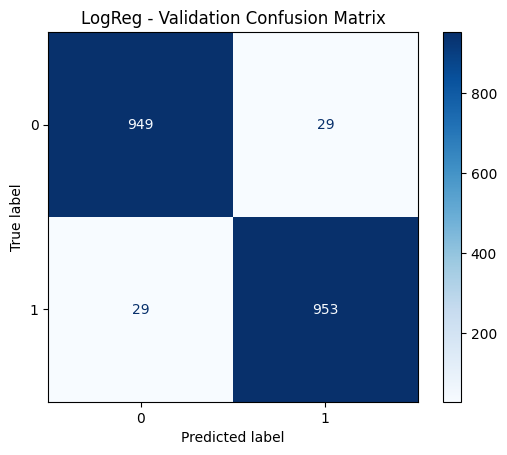

In [15]:
ConfusionMatrixDisplay(confusion_matrix(y_valid, y_valid_logreg)).plot(cmap="Blues")
plt.title("LogReg - Validation Confusion Matrix")
plt.show()

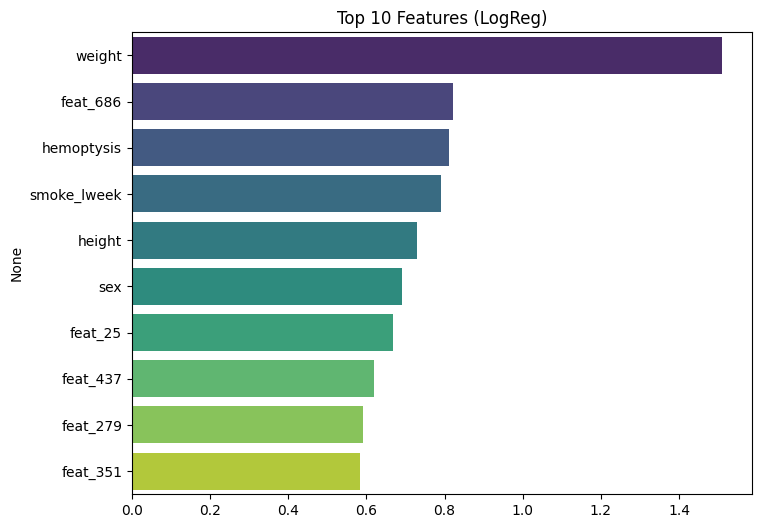

In [16]:
coeffs = pd.Series(logreg.coef_[0], index=all_features)
top10_logreg = coeffs.abs().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,6))
sns.barplot(x=top10_logreg.values, y=top10_logreg.index, palette="viridis")
plt.title("Top 10 Features (LogReg)")
plt.show()

In [17]:
# building model with random forest

In [18]:
rf = RandomForestClassifier(n_estimators=100, max_depth=6, class_weight="balanced", random_state=42)
cv_results = cross_validate(
    rf, X_train_scaled, y_train, cv=cv,
    scoring=["accuracy","f1","roc_auc"], return_estimator=False, n_jobs=1
)

print("RandomForest CV mean accuracy: {:.4f}, mean f1: {:.4f}, mean AUC: {:.4f}".format(
    cv_results["test_accuracy"].mean(),
    cv_results["test_f1"].mean(),
    cv_results["test_roc_auc"].mean()
))



RandomForest CV mean accuracy: 0.9673, mean f1: 0.9678, mean AUC: 0.9801


In [19]:
rf.fit(X_train_scaled, y_train)
y_valid_rf = rf.predict(X_valid_scaled)
y_valid_rf_proba = rf.predict_proba(X_valid_scaled)[:,1]

print("\nValidation Report (Random Forest)\n")
print(classification_report(y_valid, y_valid_rf))


Validation Report (Random Forest)

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       978
           1       0.95      0.98      0.97       982

    accuracy                           0.96      1960
   macro avg       0.97      0.96      0.96      1960
weighted avg       0.97      0.96      0.96      1960



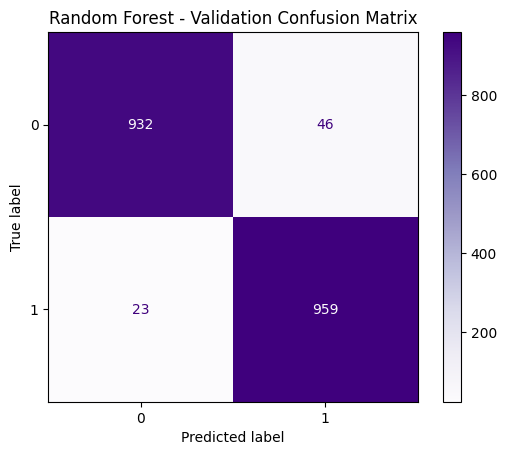

In [20]:
ConfusionMatrixDisplay(confusion_matrix(y_valid, y_valid_rf)).plot(cmap="Purples")
plt.title("Random Forest - Validation Confusion Matrix")
plt.show()

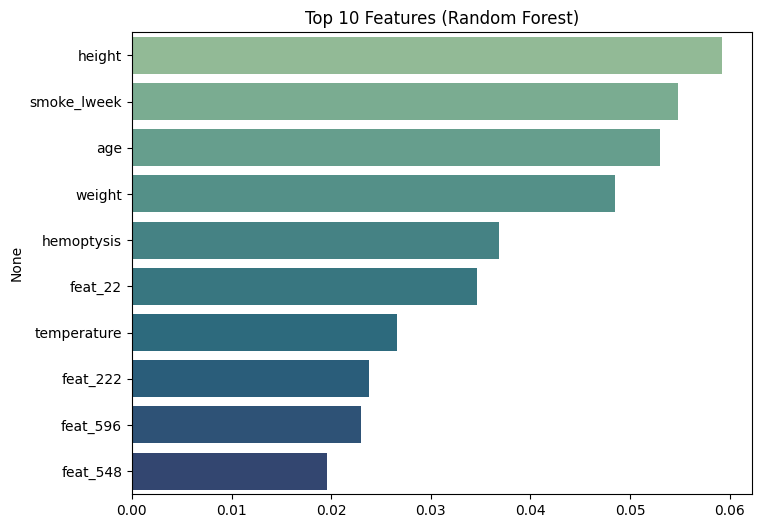

In [21]:
importances_rf = pd.Series(rf.feature_importances_, index=all_features).sort_values(ascending=False).head(10)
plt.figure(figsize=(8,6))
sns.barplot(x=importances_rf.values, y=importances_rf.index, palette="crest")
plt.title("Top 10 Features (Random Forest)")
plt.show()

In [22]:
# Building model with XGBOOST

In [23]:
xgb_base = XGBClassifier(
    n_estimators=150, learning_rate=0.1, max_depth=4,
    subsample=0.8, colsample_bytree=0.8,
    eval_metric="logloss", use_label_encoder=False, random_state=42
)

param_dist = {
    "n_estimators": [100, 150, 200],
    "max_depth": [3,4,5],
    "learning_rate": [0.05, 0.1],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

In [24]:
rs = RandomizedSearchCV(
    estimator=xgb_base, param_distributions=param_dist,
    n_iter=5, scoring="f1", cv=3, n_jobs=1, random_state=42, verbose=0
)

In [25]:
rs.fit(X_train_scaled, y_train)
best_xgb = rs.best_estimator_

In [26]:
y_valid_xgb = best_xgb.predict(X_valid_scaled)
y_valid_xgb_proba = best_xgb.predict_proba(X_valid_scaled)[:,1]

In [27]:
print("\nValidation Report (XGBoost)\n")
print(classification_report(y_valid, y_valid_xgb))


Validation Report (XGBoost)

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       978
           1       0.97      0.98      0.98       982

    accuracy                           0.97      1960
   macro avg       0.98      0.97      0.97      1960
weighted avg       0.98      0.97      0.97      1960



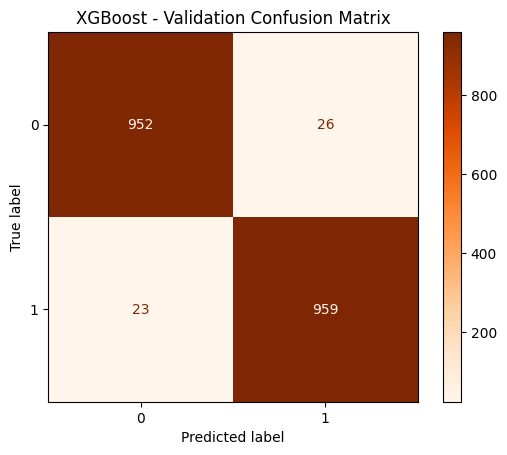

In [28]:
ConfusionMatrixDisplay(confusion_matrix(y_valid, y_valid_xgb)).plot(cmap="Oranges")
plt.title("XGBoost - Validation Confusion Matrix")
plt.show()

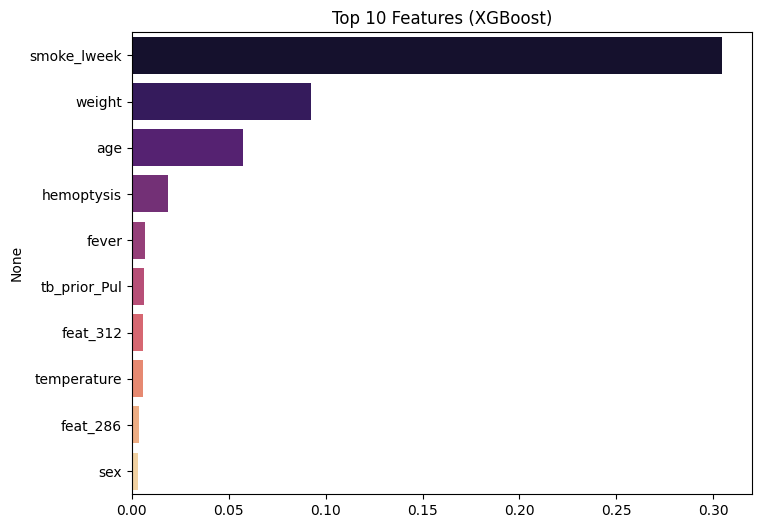

In [29]:
xgb_imp = pd.Series(best_xgb.feature_importances_, index=all_features).sort_values(ascending=False).head(10)
plt.figure(figsize=(8,6))
sns.barplot(x=xgb_imp.values, y=xgb_imp.index, palette="magma")
plt.title("Top 10 Features (XGBoost)")
plt.show()

In [41]:
xgb_imp = pd.Series(best_xgb.feature_importances_, index=all_features).sort_values(ascending=False)

# Print top 10 feature importance
print("\nTop 10 Features by XGBoost Importance:")
print(xgb_imp.head(10))


Top 10 Features by XGBoost Importance:
smoke_lweek     0.304702
weight          0.092225
age             0.057313
hemoptysis      0.018385
fever           0.006571
tb_prior_Pul    0.005986
feat_312        0.005623
temperature     0.005550
feat_286        0.003471
sex             0.003373
dtype: float32


In [30]:
#building model with MLP

In [31]:
mlp = MLPClassifier(hidden_layer_sizes=(64,32), alpha=0.001, max_iter=500, random_state=42)
mlp.fit(X_train_scaled, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=(64, 32), max_iter=500,
              random_state=42)

In [32]:
y_valid_mlp = mlp.predict(X_valid_scaled)
y_valid_mlp_proba = mlp.predict_proba(X_valid_scaled)[:,1]

print("\nValidation Report (MLP)\n")
print(classification_report(y_valid, y_valid_mlp))


Validation Report (MLP)

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       978
           1       0.97      0.96      0.97       982

    accuracy                           0.97      1960
   macro avg       0.97      0.97      0.97      1960
weighted avg       0.97      0.97      0.97      1960



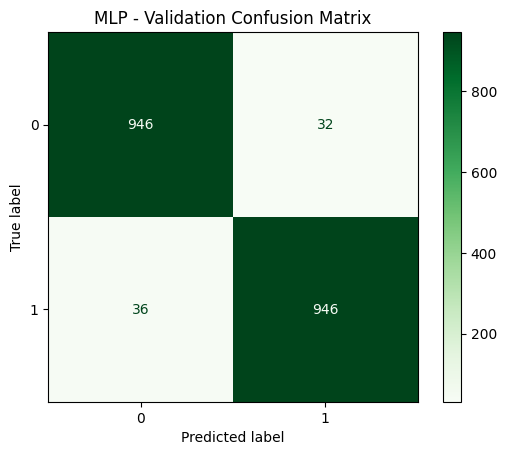

In [33]:
ConfusionMatrixDisplay(confusion_matrix(y_valid, y_valid_mlp)).plot(cmap="Greens")
plt.title("MLP - Validation Confusion Matrix")
plt.show()

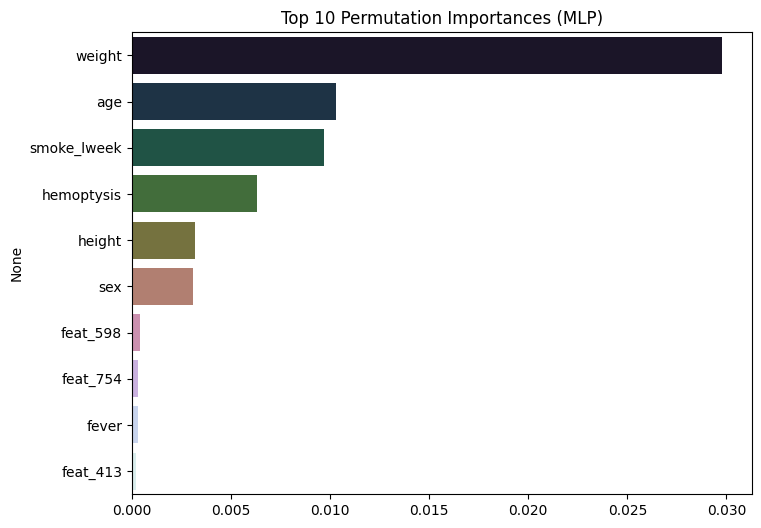

In [34]:
pi = permutation_importance(mlp, X_valid_scaled, y_valid, n_repeats=5, random_state=42, n_jobs=1)
pi_ser = pd.Series(pi.importances_mean, index=all_features).sort_values(ascending=False).head(10)
plt.figure(figsize=(8,6))
sns.barplot(x=pi_ser.values, y=pi_ser.index, palette="cubehelix")
plt.title("Top 10 Permutation Importances (MLP)")
plt.show()

In [35]:
#validation metrics and model selection
models = {
    "LogisticRegression": {"model": logreg, "y_pred": y_valid_logreg, "y_proba": y_valid_logreg_proba},
    "RandomForest": {"model": rf, "y_pred": y_valid_rf, "y_proba": y_valid_rf_proba},
    "XGBoost": {"model": best_xgb, "y_pred": y_valid_xgb, "y_proba": y_valid_xgb_proba},
    "MLP": {"model": mlp, "y_pred": y_valid_mlp, "y_proba": y_valid_mlp_proba}
}


In [36]:
selection_scores = {}
for name, info in models.items():
    y_pred = info["y_pred"]
    y_proba = info["y_proba"]
    f1 = f1_score(y_valid, y_pred, average="weighted")
    acc = accuracy_score(y_valid, y_pred)
    auc = roc_auc_score(y_valid, y_proba)
    ll  = log_loss(y_valid, y_proba)
    selection_scores[name] = {"f1":f1, "accuracy":acc, "auc":auc, "logloss":ll}
    print(f"{name} -> F1:{f1:.3f}, Acc:{acc:.3f}, AUC:{auc:.3f}, LogLoss:{ll:.3f}")


LogisticRegression -> F1:0.970, Acc:0.970, AUC:0.974, LogLoss:0.143
RandomForest -> F1:0.965, Acc:0.965, AUC:0.979, LogLoss:0.132
XGBoost -> F1:0.975, Acc:0.975, AUC:0.977, LogLoss:0.118
MLP -> F1:0.965, Acc:0.965, AUC:0.970, LogLoss:0.274


In [37]:
# saving the best model

In [38]:
# ============================================
# 10. Pick best model & save
# ============================================
weights = {"f1":0.4, "accuracy":0.4, "auc":0.3, "logloss":0.1}
final_scores = {
    m: weights["f1"]*sc["f1"] + weights["accuracy"]*sc["accuracy"] +
       weights["auc"]*sc["auc"] - weights["logloss"]*sc["logloss"]
    for m, sc in selection_scores.items()
}

best_model_name = max(final_scores, key=final_scores.get)
best_model_instance = models[best_model_name]["model"]

print("\nFinal weighted scores:")
print(final_scores)
print(f"\n Best model: {best_model_name}")




Final weighted scores:
{'LogisticRegression': np.float64(1.0542507267763976), 'RandomForest': np.float64(1.052352583687845), 'XGBoost': np.float64(1.0611453470312764), 'MLP': np.float64(1.0357682854576145)}

 Best model: XGBoost


In [39]:
os.makedirs("trained_models", exist_ok=True)
joblib.dump(best_model_instance, f"trained_models/{best_model_name}_best_model.joblib")
joblib.dump(scaler, "trained_models/scaler.joblib")
joblib.dump({"selection_scores": selection_scores, "final_scores": final_scores, "weights":weights},
            f"trained_models/{best_model_name}_metadata.joblib")


['trained_models/XGBoost_metadata.joblib']